#Gender Age Detection using Python and OpenCv

**Importing Libraries**

In [154]:
import cv2
import math
import argparse


**Function to highlight faces in an image**

In [155]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    # Set the input blob for the neural network
    net.setInput(blob)
    # Forward pass to get the detections
    detections=net.forward()
    faceBoxes=[]
    # Loop through the detection
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
    # Draw rectangle around the face
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


**File paths for face, age, and gender detection models**

In [156]:
faceProto="opencv_face_detector[1].pbtxt"
faceModel="opencv_face_detector_uint8[1].pb"
ageProto="age_deploy[1].prototxt"
ageModel="age_net[1].caffemodel"
genderProto="gender_deploy[1].prototxt"
genderModel="gender_net[1].caffemodel"


**Mean values for model input**

In [157]:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
# Labels for age and gender prediction
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

**Load neural networks for face, age, and gender detection**

In [158]:
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

**Specify the path to the image**

In [159]:
image_path = "/content/man2[1].jpg"
image_path

'/content/man2[1].jpg'

 **Read the image**

array([[[217, 226, 240],
        [217, 226, 240],
        [217, 226, 240],
        ...,
        [ 11,  22,  26],
        [ 14,  25,  29],
        [ 16,  27,  31]],

       [[217, 226, 240],
        [217, 226, 240],
        [217, 226, 240],
        ...,
        [ 12,  23,  27],
        [ 15,  26,  30],
        [ 16,  27,  31]],

       [[217, 226, 240],
        [217, 226, 240],
        [217, 226, 240],
        ...,
        [ 13,  24,  28],
        [ 15,  26,  30],
        [ 16,  27,  31]],

       ...,

       [[ 80,  91, 105],
        [ 80,  91, 105],
        [ 80,  91, 105],
        ...,
        [  7,  17,  24],
        [  9,  17,  24],
        [  9,  17,  24]],

       [[ 79,  90, 104],
        [ 79,  90, 104],
        [ 79,  90, 104],
        ...,
        [  7,  17,  24],
        [  9,  17,  24],
        [  9,  17,  24]],

       [[ 78,  89, 103],
        [ 78,  89, 103],
        [ 78,  89, 103],
        ...,
        [  7,  16,  25],
        [  9,  17,  24],
        [  9,  17,  24]]], dtype=uint8)
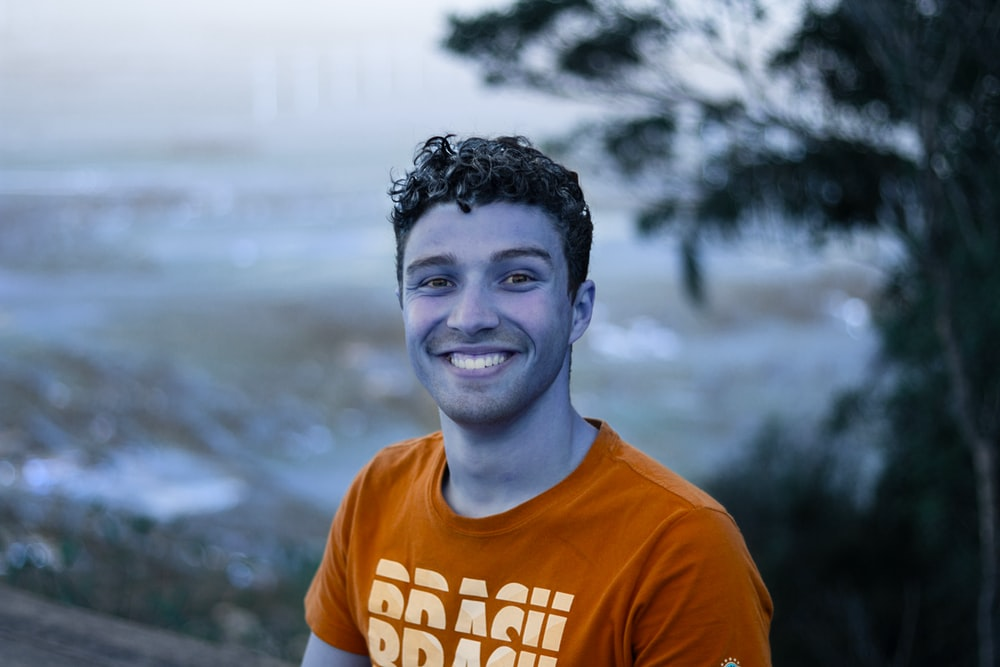

In [160]:
frame = cv2.imread(image_path)
frame

**Highlight faces in the image**

In [161]:

resultImg, faceBoxes = highlightFace(faceNet, frame)


In [162]:
if not faceBoxes:
    print("No face detected")

In [163]:
padding = 20
# Loop through each detected face
for faceBox in faceBoxes:
    face = frame[max(0, faceBox[1] - padding):
    # Extract the face region from the frame
                min(faceBox[3] + padding, frame.shape[0] - 1), max(0, faceBox[0] - padding)
                :min(faceBox[2] + padding, frame.shape[1] - 1)]

**Preprocess the face image for gender prediction and Predict gender**

In [164]:
blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
#Predict gender
genderNet.setInput(blob)
genderPreds = genderNet.forward()
gender = genderList[genderPreds[0].argmax()]
print(f'Gender: {gender}')

Gender: Male


 **Predict age**

In [165]:
#Predict age
ageNet.setInput(blob)
agePreds = ageNet.forward()
age = ageList[agePreds[0].argmax()]
print(f'Age: {age[1:-1]} years')


Age: 25-32 years


**To display images in Google Colab**

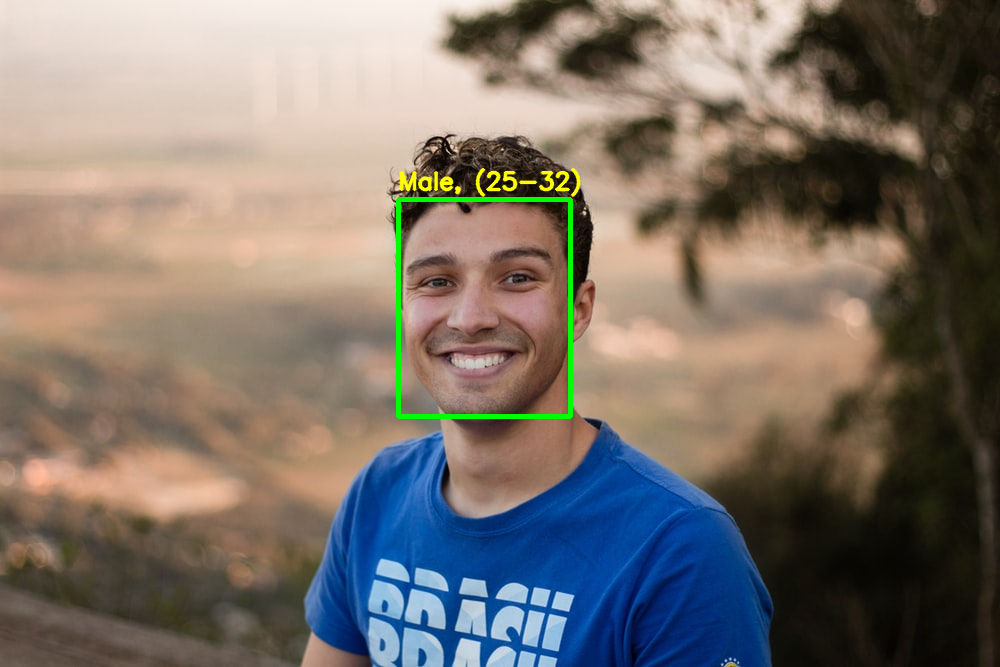

In [166]:
from google.colab.patches import cv2_imshow
 # Draw text on the image with predicted gender and age
cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
cv2_imshow(resultImg)
# Display the image with annotations
cv2.waitKey(0)
cv2.destroyAllWindows()